# Sentiment Analysis : Predicting sentiment of COVID-19 tweets

## Problem Description

This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

The names and usernames have been given codes to avoid any privacy concerns.

You are given the following information:



1.   Location
2.   Tweet At
3.   Original Tweet
4.   Label

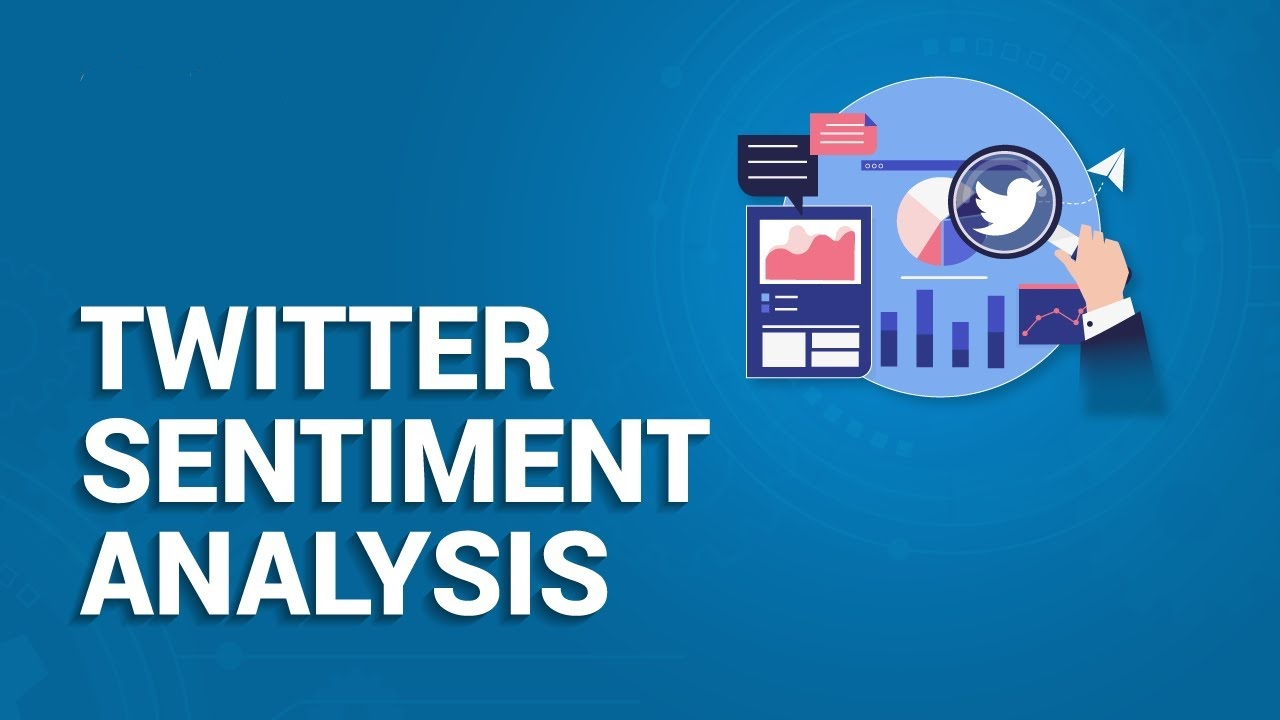

## Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Loading Dataset

In [24]:
# Using github to load the dataset
url = 'https://raw.githubusercontent.com/Azhar-ali7/Classification-Project-Coronavirus-Tweet-Sentiment/main/Coronavirus%20Tweets.csv'


tweet_df = pd.read_csv(url, encoding = 'latin-1')

Let's look at the top five rows and columns of the dataset.

In [6]:
# Top five rows of the dataset
tweet_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [7]:
# looking at the shape of the dataset
tweet_df.shape

(41157, 6)

In [8]:
# No. of rows in Dataset are
print('No. of rows in Dataset are', tweet_df.shape[0])

# No. of columns in Dataset are
print('No. of columns in Dataset are', tweet_df.shape[1])

No. of rows in Dataset are 41157
No. of columns in Dataset are 6


In [9]:
# Checking for uniques values in the data set
for j in tweet_df.columns:
  print('Total unique values in column', j, "->", len(tweet_df.values),'\n' )

Total unique values in column UserName -> 41157 

Total unique values in column ScreenName -> 41157 

Total unique values in column Location -> 41157 

Total unique values in column TweetAt -> 41157 

Total unique values in column OriginalTweet -> 41157 

Total unique values in column Sentiment -> 41157 



In [10]:
# Name of columns in the dataset
tweet_df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [11]:
# Description of the dataset
tweet_df.describe(include='all')

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
count,41157.000000,41157.000000,32567,41157,41157,41157
unique,NaN,NaN,12220,30,41157,5
top,NaN,NaN,London,20-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Positive
freq,NaN,NaN,540,3448,1,11422
mean,24377.000000,69329.000000,NaN,NaN,NaN,NaN
std,11881.146851,11881.146851,NaN,NaN,NaN,NaN
min,3799.000000,48751.000000,NaN,NaN,NaN,NaN
25%,14088.000000,59040.000000,NaN,NaN,NaN,NaN
50%,24377.000000,69329.000000,NaN,NaN,NaN,NaN
75%,34666.000000,79618.000000,NaN,NaN,NaN,NaN


In [12]:
# Info
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


As we saw in the cell above that there are some null values present in the 'Location' column. Now, let's find out the exact number of missing values.

In [13]:
# Finding missing values
tweet_df.isna().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [14]:
# Null values in terms of percentage
tweet_df.isna().sum()/tweet_df.shape[0]*100

UserName          0.000000
ScreenName        0.000000
Location         20.871298
TweetAt           0.000000
OriginalTweet     0.000000
Sentiment         0.000000
dtype: float64

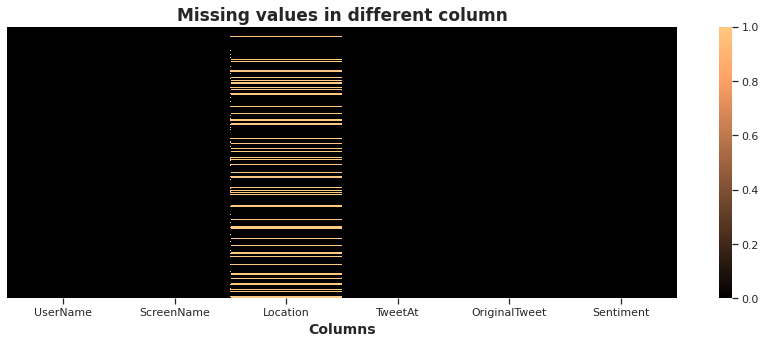

In [15]:
# Plotting heatmap of different columns to check the missing values
plt.figure(figsize=(15, 5))
sns.heatmap(tweet_df.isnull(), cbar=True, yticklabels=False, cmap='copper')
plt.xlabel("Columns", size=14, fontweight="bold")
plt.title("Missing values in different column",fontweight="bold",size=17)
plt.show()

We will fill the null values in 'Location' with 'Unknown' because we don't know the locations of the tweets.

In [22]:
# Filling null values in 'Location' with unknown
tweet_df.fillna(('Unknown') ,inplace = True)

In [17]:
# Checking for duplicapte values in the data set
# tweet_df.duplicated().sum()

0

There are no duplicates values in this dataset

## Exploratory Data Analysis

In [25]:
# Assigning a variable to store the top 10 location from 'Location'
top_loc = tweet_df['Location'].value_counts().head(12)

# Converting the variable into dataframe
top_loc = pd.DataFrame(top_loc)

# reseting index
top_loc.reset_index(inplace= True)

# renaming the columns
top_loc.rename(columns = {'index': 'Location', 'Location': 'Tweet Count'}, inplace= True)

# head of this datafeame
top_loc.head(12)

,Location,Tweet Count
0,London,540
1,United States,528
2,"London, England",520
3,"New York, NY",395
4,"Washington, DC",373
5,United Kingdom,337
6,"Los Angeles, CA",281
7,India,268
8,UK,232
9,Australia,225


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

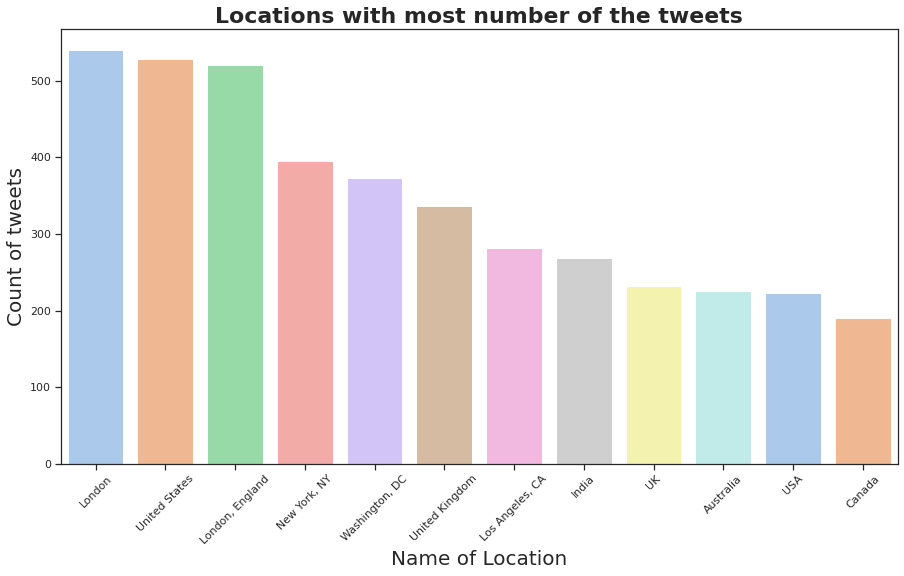

In [26]:
# plotting the barplot top 10 locations with most number of tweets

# setting figure size
sns.set(rc={'figure.figsize':(15,8)})

# background style of figure
sns.set_style('ticks')

# barplot
sns.barplot(x='Location', y='Tweet Count', data= top_loc, palette='pastel')

# setting title
plt.title('Locations with most number of the tweets', fontweight='bold', fontsize = 22)

# label on y-axis
plt.ylabel('Count of tweets', fontsize = 20)

# label on x-axis
plt.xlabel('Name of Location', fontsize = 20)

# rotating x-labels for better visuluzation
plt.xticks(rotation=45)

In [28]:
# counting the values in 'TweetAt' colums
tweet_df['TweetAt'].value_counts().to_frame().head(10)

,TweetAt
20-03-2020,3448
19-03-2020,3215
25-03-2020,2979
18-03-2020,2742
21-03-2020,2653
22-03-2020,2114
23-03-2020,2062
17-03-2020,1977
08-04-2020,1881
07-04-2020,1843


In [18]:
# description of 'TweetAt'
tweet_df.TweetAt.describe()

count          41157
unique            30
top       20-03-2020
freq            3448
Name: TweetAt, dtype: object

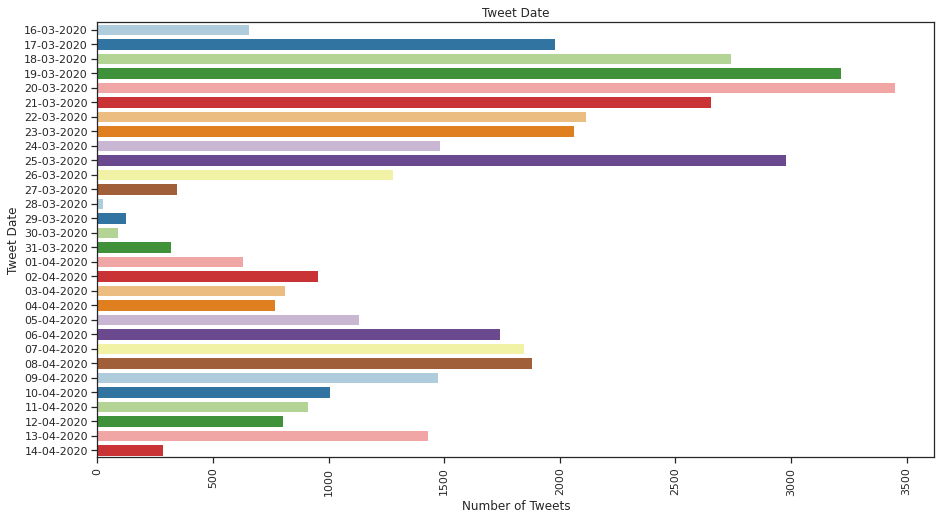

<Figure size 2880x864 with 0 Axes>

In [35]:
# Count plot
sns.countplot(y='TweetAt', data= tweet_df, palette='Paired')

# Setting title
plt.title("Tweet Date")

# Setting x-label
plt.ylabel("Tweet Date")

# Setting y-label
plt.xlabel("Number of Tweets")

# Adjusting x-labels
plt.xticks(rotation = 90)


In [20]:
# twee = tweet_df['TweetAt'].sort_values()

Text(0.5, 1.0, 'Number of tweets by date')

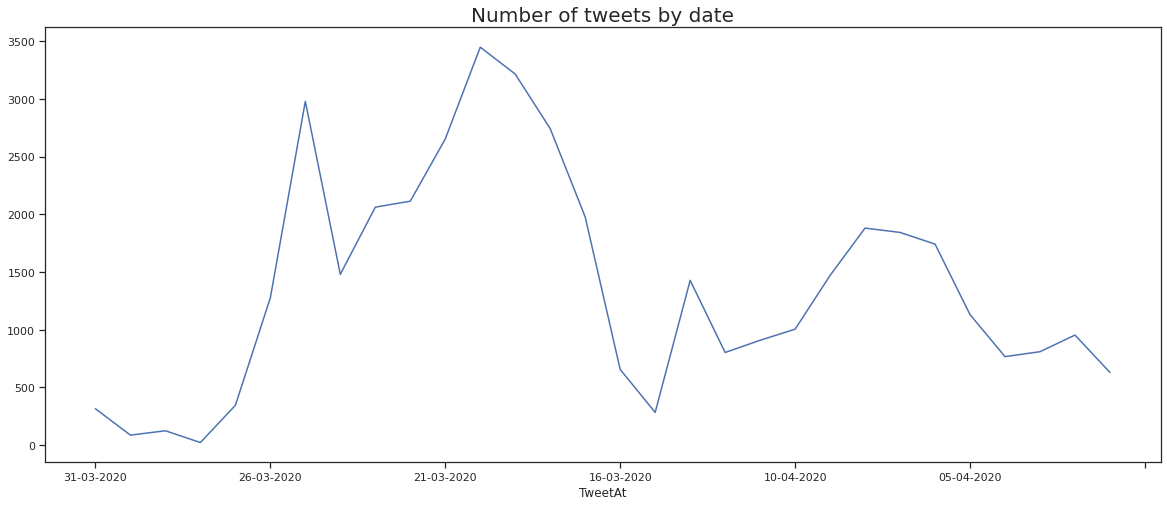

In [36]:
# Line plot of number of tweet by date
plt.figure(figsize=(20,8))

# Using groupby function
grp_tweetAt=tweet_df.groupby('TweetAt').count().sort_values(by='TweetAt',ascending = False)['OriginalTweet'].plot()

# setting title and fontsize
plt.title('Number of tweets by date', fontsize = 20)

### Length of 'OriginalTweet'

In [37]:
# checking the length og 'OriginalTweet'
tweet_df['OriginalTweet'].str.len()

0        111
1        237
2        131
3        306
4        310
        ... 
41152    102
41153    138
41154    136
41155    111
41156    255
Name: OriginalTweet, Length: 41157, dtype: int64

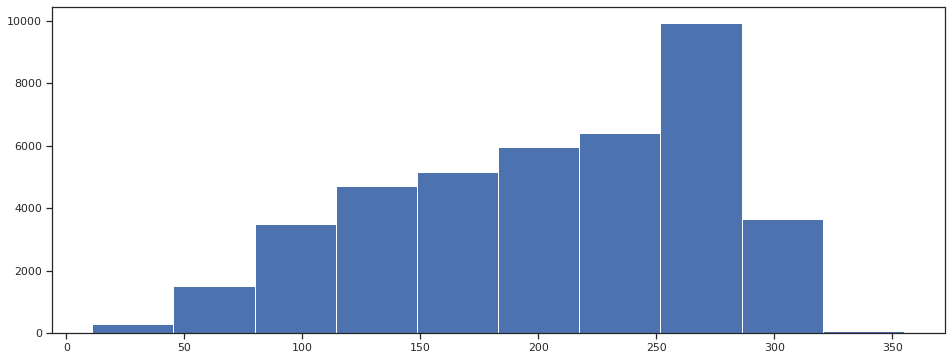

In [38]:
# setting the figure size
plt.figure(figsize=(16,6))

# plottting the histogram of the length of 'OriginalTweet'
plt.hist(tweet_df['OriginalTweet'].str.len())

# showing the plot
plt.show()

In [39]:
# Total value count of  all 'Sentiments'
tweet_df['Sentiment'].value_counts().to_frame()

,Sentiment
Positive,11422
Negative,9917
Neutral,7713
Extremely Positive,6624
Extremely Negative,5481


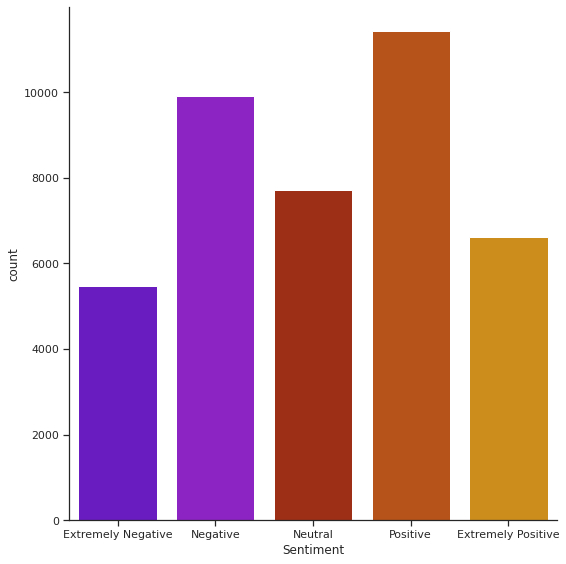

In [40]:
# sentiment countplot
sns.catplot('Sentiment', data= tweet_df, kind='count', height=8, palette= 'gnuplot',
            order=['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive']) # setting the order of sentiments from negative to positive

In [42]:
# Making a copy of the dataframe
tt_df = tweet_df.copy()

# Creating the new column 'Text'
tt_df['text'] = tt_df.OriginalTweet

# Connverting the 'text' column to string type
tt_df["text"] = tt_df["text"].astype(str)

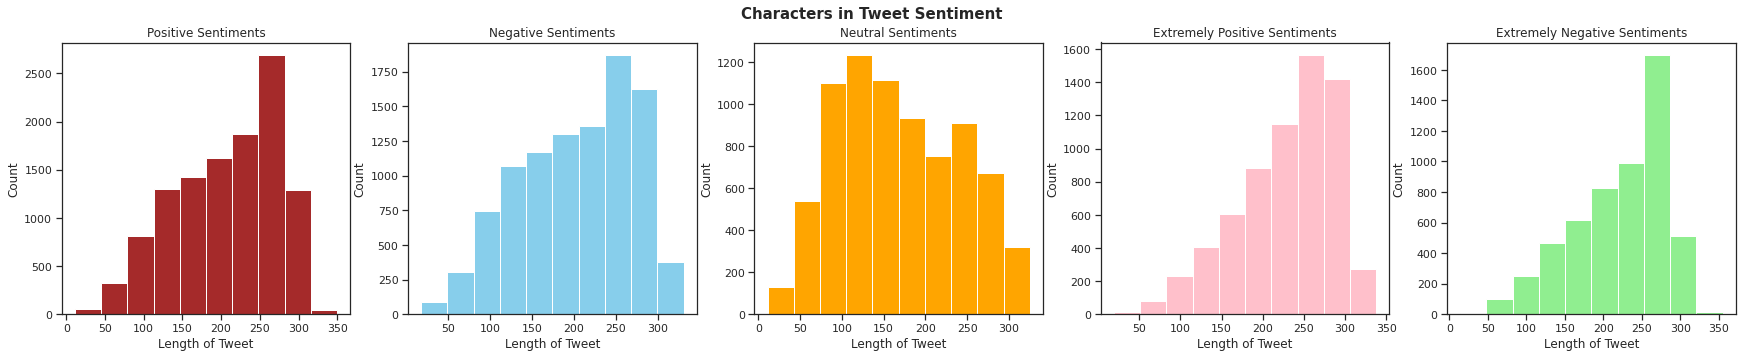

In [53]:
# Plotting the number of character in all tweets for different types of sentiments using subplots
figure, (axes1,axes2,axes3,axes4,axes5)= plt.subplots(1,5,figsize=(30,5)) 

# first histogram
# Selecting only 'Positive' sentiment tweets and converting 'text' to sting (for length calculation)
tweet_len=tt_df[tt_df['Sentiment']=="Positive"]['text'].str.len()
axes1.hist(tweet_len,color='brown')
axes1.set_title('Positive Sentiments')
axes1.set_xlabel('Length of Tweet')
axes1.set_ylabel('Count')

# Sencond histogram
# Selecting only 'Negative' sentiment tweets and converting 'text' to sting (for length calculation)
tweet_len=tt_df[tt_df['Sentiment']=="Negative"]['text'].str.len()
axes2.hist(tweet_len,color='skyblue')
# Setting x-label, y-label and title
axes2.set_title('Negative Sentiments')
axes2.set_xlabel('Length of Tweet')
axes2.set_ylabel('Count')

# Third histogram
# Selecting only 'Neutral' sentiment tweets and converting 'text' to sting (for length calculation)
tweet_len=tt_df[tt_df['Sentiment']=="Neutral"]['text'].str.len()
axes3.hist(tweet_len,color='orange')
# Setting x-label, y-label and title
axes3.set_title('Neutral Sentiments')
axes3.set_xlabel('Length of Tweet')
axes3.set_ylabel('Count')

# Fourth histogram
# Selecting only 'Extremely Positive' sentiments tweets and converting 'text' to sting (for length calculation)
tweet_len=tt_df[tt_df['Sentiment']=="Extremely Positive"]['text'].str.len()
axes4.hist(tweet_len,color='pink')
# Setting x-label, y-label and title
axes4.set_title('Extremely Positive Sentiments')
axes4.set_xlabel('Length of Tweet')
axes4.set_ylabel('Count')

# Fifth histogram
# Selecting only 'Extremely Negative' sentiments tweets and converting 'text' to sting (for length calculation)
tweet_len=tt_df[tt_df['Sentiment']=="Extremely Negative"]['text'].str.len()
axes5.hist(tweet_len,color='lightgreen')
# Setting x-label, y-label and title
axes5.set_title('Extremely Negative Sentiments')
axes5.set_xlabel('Length of Tweet')
axes5.set_ylabel('Count')

# Setting title
figure.suptitle("Characters in Tweet Sentiment", size=15,fontweight="bold")

# Showing the plot
plt.show()



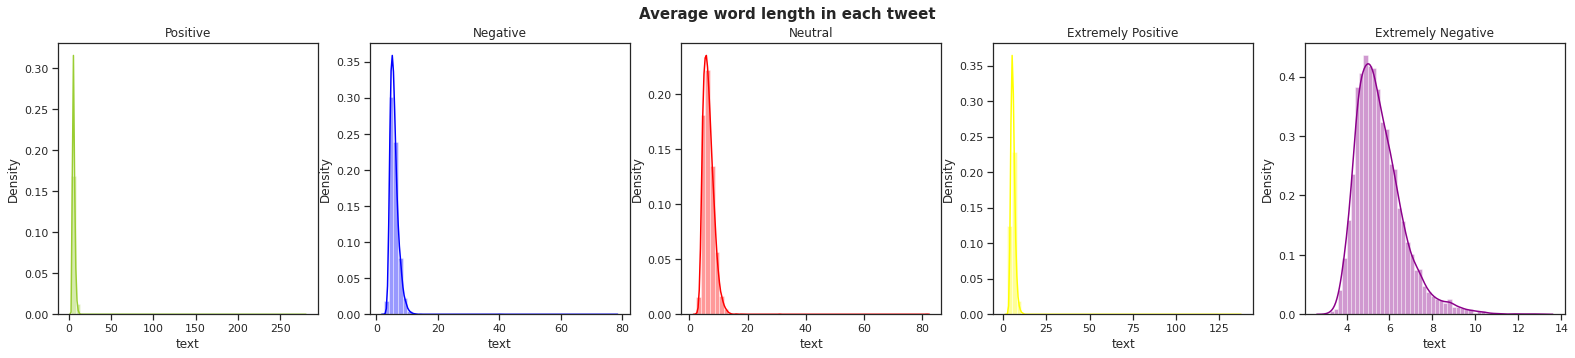

In [55]:
# Finding the average word length in each tweet sentiment type. 
fig,(axe1,axe2,axe3,axe4,axe5)=plt.subplots(1,5,figsize=(27,5))

word= tt_df[tt_df['Sentiment']=="Positive"]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=axe1,color='yellowgreen')
axe1.set_title('Positive')

word= tt_df[tt_df['Sentiment']=="Negative"]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=axe2,color='blue')
axe2.set_title('Negative')

word= tt_df[tt_df['Sentiment']=="Neutral"]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=axe3,color='red')
axe3.set_title('Neutral')

word= tt_df[tt_df['Sentiment']=="Extremely Positive"]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=axe4,color='yellow')
axe4.set_title('Extremely Positive')

word= tt_df[tt_df['Sentiment']=="Extremely Negative"]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=axe5,color='darkmagenta')
axe5.set_title('Extremely Negative')

# Showing the Plot 

fig.suptitle('Average word length in each tweet', size=15,fontweight="bold")
plt.show()

In [29]:
tt_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,text
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths to give elde...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"Me, ready to go at supermarket during the #COV..."


In [56]:
import re

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

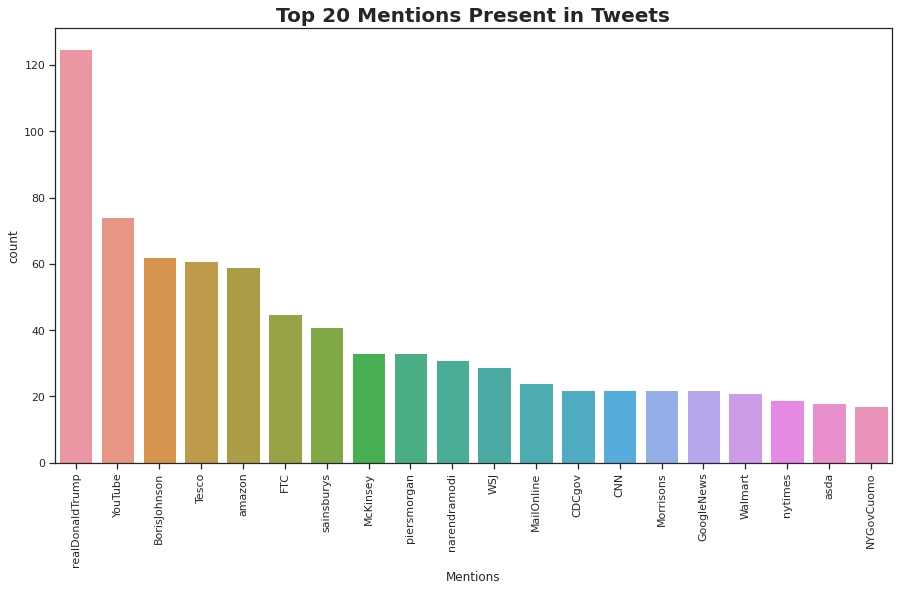

In [57]:
# defining a function 
def mentions(text):
  '''
  this function finds words starting with '@' symbol
  '''
  line=re.findall(r'(?<=@)\w+',text)
  return " ".join(line)

# applying the above function on 'text' and naming it as new column 'mentions'
tt_df['mentions']=tt_df['text'].apply(lambda x:mentions(x))

# assiging a variable to store the top 20 mentions
temp1 =tt_df['mentions'].value_counts()[:][1:21]

# changing the column names after converting 'temp1' to DataFrame and resetting index
temp1 =temp1.to_frame().reset_index().rename(columns={'index':'Mentions','mentions':'count'})


# Ploting the bar plot 
sns.barplot(x="Mentions",y="count", data = temp1)

# Setting title and adjusting fonts
plt.title("Top 20 Mentions Present in Tweets", fontweight='bold', fontsize = 20)

# Rotating the labels on x-axis for better visualization
plt.xticks(rotation= 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

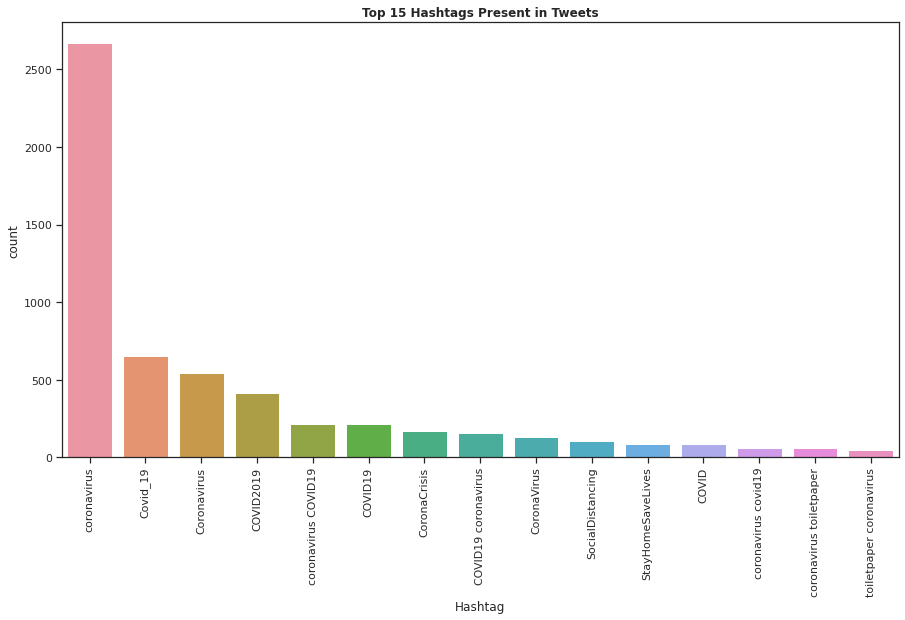

In [58]:
# defining a function
def hashtags(text):
  '''
  this function find the words starting with '#' punctuation
  '''
  line=re.findall(r'(?<=#)\w+',text)
  return " ".join(line)
  
tt_df['Hashtag']=tt_df['text'].apply(lambda x:hashtags(x))

temp=tt_df['Hashtag'].value_counts()[:][1:16]
temp =temp.to_frame().reset_index().rename(columns={'index':'Hashtag','Hashtag':'count'})

# Bar plot 
sns.barplot(x="Hashtag",y="count", data = temp)
plt.title("Top 15 Hashtags Present in Tweets", fontweight='bold')
plt.xticks(rotation= 90)

##Text Pre-Processing

In [65]:
# Making a copy
df_t = tweet_df.copy()

removing @

In [66]:
# # defining a function
# def remove_symbols(text_input, symbol):

#   ''' this function removes @user symbol '''

#   r = re.findall(symbol, text_input)
#   for i in r:
#     text_input = re.sub(i,'',text_input)
#   return text_input

In [67]:
# # create new column with removed @user
# df_t['Cleaned_Tweet'] = np.vectorize(remove_symbols)(df_t['OriginalTweet'], '@[\w]*')

###Removing url from tweets

In [77]:
# Making a different columns for Cleaned Tweet
df_t['Cleaned_Tweet'] = df_t['OriginalTweet']

In [70]:
# Removing 'https:\/\/' from Cleaned tweet using lambda function
df_t['Cleaned_Tweet'] = df_t['Cleaned_Tweet'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [71]:
# import 
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [78]:
## Function to remove punctuation

def remove_punctuations(text):
  ''' function to remove punctuations'''

  # replacing the punctuations with no space
  translator = str.maketrans('','', string.punctuation)

  # return the text stripped of punctuation marks
  return text.translate(translator)

In [79]:
# applying the function defined above
df_t['Cleaned_Tweet'] = df_t['Cleaned_Tweet'].apply(remove_punctuations)

###removee short words

In [81]:
# Importing Natural Language Toolkit
import nltk

# stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [82]:
# extracting stopwords from the nltk library
stop_words = stopwords.words('english')

# stopwords
np.array(stop_words)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [83]:
# defining a fuction

def remove_stopwords(text):
  '''
  This function removes stop words and converts text to lowercase
  '''

  ## removing stopwords after converting the text to lowercase
  text = [word.lower() for word in text.split() if word.lower() not in stop_words]

  # joining the list of words with space separator 
  return " ".join(text)



In [84]:
# Applying the function to remove the stopwords
df_t['Cleaned_Tweet'] = df_t['Cleaned_Tweet'].apply(remove_stopwords)

In [85]:
# head
df_t.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Cleaned_Tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,menyrbie philgahan chrisitv httpstcoifz9fan2pa...
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice talk neighbours family exchange phone n...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths give elderly ...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock one empty please dont panic enough ...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,ready go supermarket covid19 outbreak im paran...


###Stemming

In [86]:
# Importing snowball stemmer
from nltk.stem.snowball import SnowballStemmer

In [94]:
# Object for stemming
stemmer = SnowballStemmer("english")

# defining a function 
def stemming(text):    
    '''
    this function stems each word in the given text
    '''

    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [95]:
# applying stemming defined in above function on 'Cleaned_Tweet' column
df_t['Cleaned_Tweet'] = df_t['Cleaned_Tweet'].apply(stemming)
df_t.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Cleaned_Tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,menyrbi philgahan chrisitv httpstcoifz9fan2pa ...
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advic talk neighbour famili exchang phone numb...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworth give elder dis...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock one empti plea dont panic enough fo...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,readi go supermarket covid19 outbreak im paran...


###hash

In [50]:
# Using function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r'#(\w+)', i)
        hashtags.append(ht)
    return hashtags

In [51]:
# Extracting hashtags from different tweets as per sentiments
Htg_Extremely_Positive = hashtag_extract(df_t['OriginalTweet'][df_t['Sentiment'] == 'Extremely Positive'])
Htg_Positive = hashtag_extract(df_t['OriginalTweet'][df_t['Sentiment'] == 'Positive'])
Htg_Neutral = hashtag_extract(df_t['OriginalTweet'][df_t['Sentiment'] == 'Neutral'])
Htg_Negative = hashtag_extract(df_t['OriginalTweet'][df_t['Sentiment'] == 'Negative'])
Htg_Extremely_Negative = hashtag_extract(df_t['OriginalTweet'][df_t['Sentiment'] == 'Extremely Negative'])

In [52]:


# Unnesting list
Htg_Extremely_Positive = sum(Htg_Extremely_Positive, [])
Htg_Positive = sum(Htg_Positive, [])
Htg_Neutral = sum(Htg_Neutral, [])
Htg_Negative = sum(Htg_Negative,[])
Htg_Extremely_Negative = sum(Htg_Extremely_Negative,[])



In [53]:


# Printing the result
print("Hashtag Extremely Positive Words : ", Htg_Extremely_Positive)
print("Hashtag Positive Words : ", Htg_Positive)
print("Hashtag Neutral Words : ", Htg_Neutral)
print("Hashtag Negative Words : ", Htg_Negative)
print("Hashtag Extremely Negative Words : ", Htg_Extremely_Negative)



Hashtag Extremely Positive Words :  ['horningsea', 'COVID2019', 'Trials', 'Monthly', 'Yearly', 'Prices', 'Subscriptions', 'bestiptv', 'iptv', 'Service', 'Iptv', 'iptvdeals', 'Cheap', 'ipTV', 'Football', 'HD', 'Movies', 'Adult', 'Cinema', 'hotmovies', 'iptvnew', 'iptv2020', 'Adult', 'COVID2019', 'Trials', 'Monthly', 'Yearly', 'Prices', 'Subscriptions', 'bestiptv', 'iptv', 'Service', 'Iptv', 'iptvdeals', 'Cheap', 'ipTV', 'Football', 'HD', 'Movies', 'Adult', 'Cinema', 'hotmovies', 'ipTv', '18Movies', 'consumer', 'covid19', 'tracker', 'BreakingNews', 'Breaking', 'Coronavirus', 'CoronavirusOutbreak', 'COVID19', 'COVID', 'COVID_19', 'COVID2019', 'Collapse', 'CoronavirusOutbreak', 'coronavirus', 'COVID2019', 'jlmco', 'jlmcobrand', 'coronapocolypse', 'coronavirus', 'CoronavirusOutbreak', 'COVID19', 'shoponline', 'coronavirus', 'COVID19', 'peoplearelosingtheirminds', 'StopTheMadness', 'stoppanicbuying', 'coronavirus', 'StopPanicBuying', 'BeKind', 'mufc', 'MUFC_Family', 'Malaysia2020', 'Malaysia

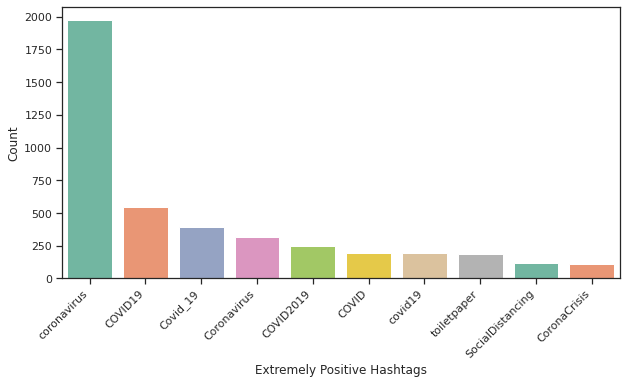

In [54]:
# Making frequency distribution of top 10 Extremely Positive hashtags
a = nltk.FreqDist(Htg_Extremely_Positive)

#Creating dataframe 
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})
d = d.nlargest(columns = 'Count', n = 10)

# Plot No- 19
# Plotting the result 
plt.figure(figsize = (10,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count',palette= 'Set2')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Extremely Positive Hashtags",fontsize = 12)
plt.show()


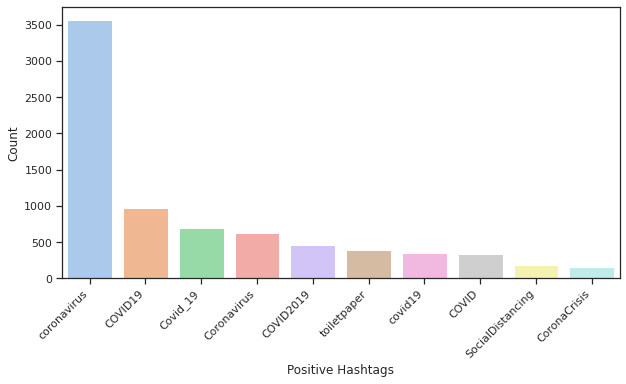

In [55]:
# Making frequency distribution top 10 Positive hashtags
b = nltk.FreqDist(Htg_Positive)

#Creating dataframe 
d = pd.DataFrame({'Hashtag': list(b.keys()),
                  'Count' : list(b.values())})
d = d.nlargest(columns = 'Count', n = 10)

# Plot No- 20
# Plotting the result
plt.figure(figsize = (10,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count',palette='pastel')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Positive Hashtags",fontsize = 12)
plt.show()

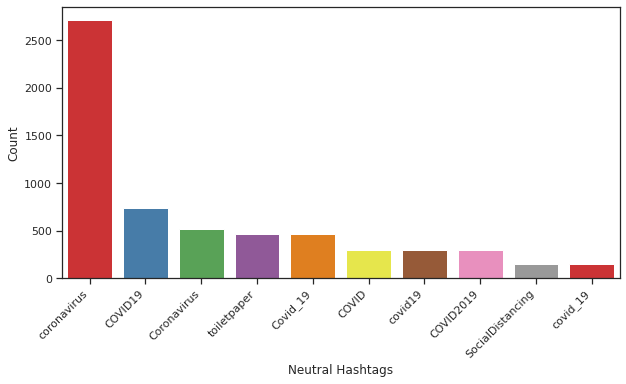

In [56]:
# making frequency distribution top 10 Neutral hashtags
c = nltk.FreqDist(Htg_Neutral)

#Creating dataframe 
d = pd.DataFrame({'Hashtag': list(c.keys()),
                  'Count' : list(c.values())})
d = d.nlargest(columns = 'Count', n = 10)

# Plotting the result
plt.figure(figsize = (10,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count', palette='Set1')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Neutral Hashtags",fontsize = 12)
plt.show()



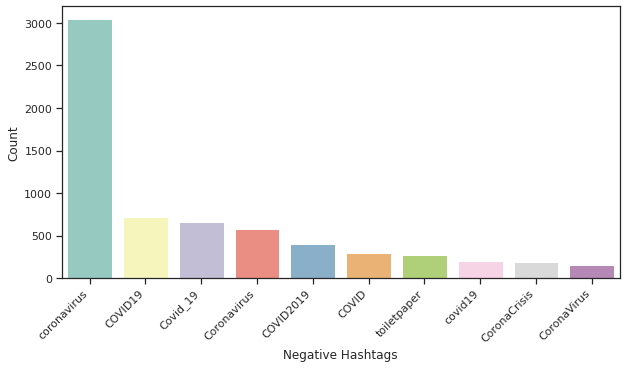

In [57]:


# making frequency distribution top 10 Negative hashtags
e = nltk.FreqDist(Htg_Negative)

#Creating dataframe 
d = pd.DataFrame({'Hashtag': list(e.keys()),
                  'Count' : list(e.values())})
d = d.nlargest(columns = 'Count', n = 10)

# Plot No- 22
# Plotting the result
plt.figure(figsize = (10,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count', palette='Set3')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Negative Hashtags",fontsize = 12)
plt.show()



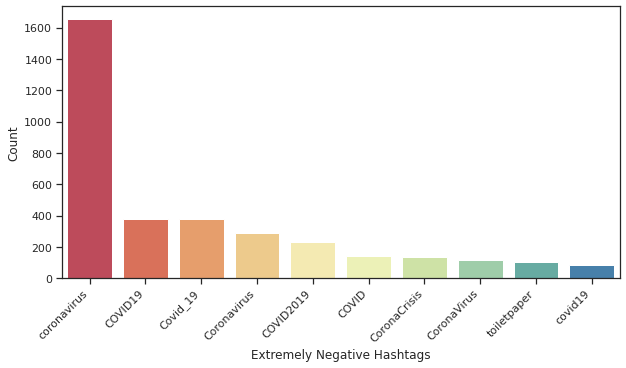

In [58]:


# making frequency distribution top 10 Extremely Negative hashtags
f = nltk.FreqDist(Htg_Extremely_Negative)

#Creating dataframe 
d = pd.DataFrame({'Hashtag': list(f.keys()),
                  'Count' : list(f.values())})
d = d.nlargest(columns = 'Count', n = 10)

# Plot No- 23
# Plotting the result
plt.figure(figsize = (10,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count', palette='Spectral')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Extremely Negative Hashtags",fontsize = 12)
plt.show()



features

In [59]:
# Creating new dataframe
df_tnew = df_t[['Cleaned_Tweet', 'Sentiment']]
df_tnew.head(10)


,Cleaned_Tweet,Sentiment
0,,Neutral
1,advic talk neighbour famili exchang phone numb...,Positive
2,coronavirus australia woolworth give elder dis...,Positive
3,food stock one empti pleas dont panic enough f...,Positive
4,readi go supermarket covid19 outbreak im paran...,Extremely Negative
5,news regionâ first confirm covid19 case came ...,Positive
6,cashier groceri store share insight covid19 pr...,Positive
7,supermarket today didnt buy toilet paper rebel...,Neutral
8,due covid19 retail store classroom atlanta ope...,Positive
9,corona preventionw stop buy thing cash use onl...,Negative


In [60]:
from wordcloud import WordCloud
from PIL import Image

# Creating an array from the image (Map of NYC with white background) using numpy and creating a mask.

wordcloud_mask = np.array(Image.open('/content/drive/MyDrive/tweet_img.png'))

In [61]:
# create text from all tweets
total_words = ' '.join([text for text in df_tnew['Cleaned_Tweet']])

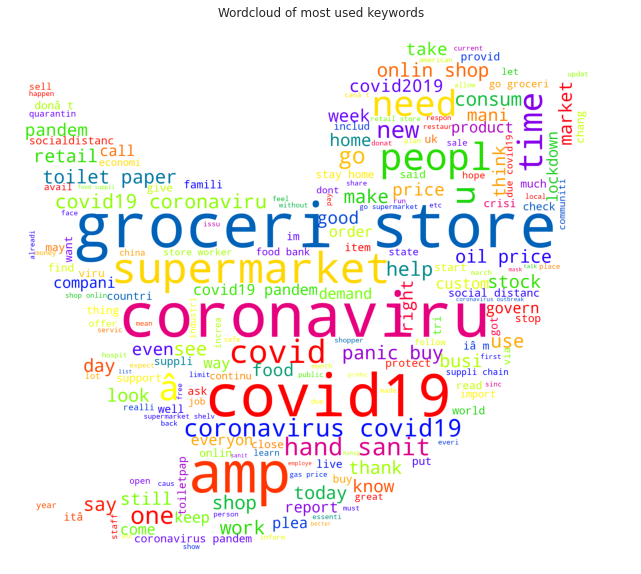

In [62]:
cloud = WordCloud(scale=3, colormap='prism' ,background_color='white',collocations=True, mask=wordcloud_mask).generate(total_words)

# Figure Size and no axis as it is an image
plt.figure(figsize=(15,10))
plt.imshow(cloud)
plt.axis('off')

# Setting title
plt.title('Wordcloud of most used words')
plt.show()


##Feature Engineering


encoding statement

In [63]:
# Encoding the sentiments from -1, 0 and 1 i.e., from extremely positive to extremely negative
sentiment_map = {"Extremely Negative":-1, "Negative":-1, "Neutral":0, "Positive":1,"Extremely Positive":1}
df_tnew['Sentiment'] = df_tnew['Sentiment'].map(sentiment_map)

In [64]:
df_tnew.head()

,Cleaned_Tweet,Sentiment
0,,0
1,advic talk neighbour famili exchang phone numb...,1
2,coronavirus australia woolworth give elder dis...,1
3,food stock one empti pleas dont panic enough f...,1
4,readi go supermarket covid19 outbreak im paran...,-1


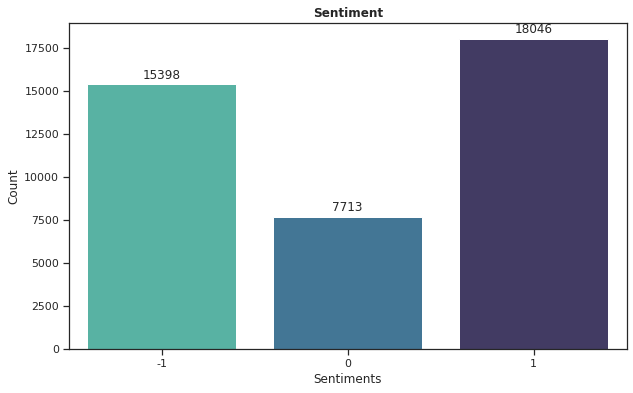

In [65]:
# Plot No- 31
# Plotting the Encoded Sentiments value as countplot 
plt.figure(figsize=(10,6))
splot = sns.countplot(x='Sentiment', data=df_tnew,palette="mako_r")
# adding annotation
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0,9), textcoords = 'offset points')
plt.title("Sentiment", fontweight='bold')
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Sentiments",fontsize = 12)
plt.show()

In [66]:
# Importing libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, precision_score, recall_score, accuracy_score, precision_recall_curve
from sklearn.model_selection import train_test_split

In [67]:
df_tnew.isnull().sum()

Cleaned_Tweet    0
Sentiment        0
dtype: int64

##Train Test Split

In [68]:
#stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
train,valid = train_test_split(df_tnew,test_size = 0.2,random_state=0,stratify = df_tnew.Sentiment.values)

#Printing the result 
print("train shape : ", train.shape)
print("valid shape : ", valid.shape)


train shape :  (32925, 2)
valid shape :  (8232, 2)


Count vectoerizer for multi class classifiication

In [69]:
# Importing libraries
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

# Applying stopwards and CountVectorizer for NLP
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

# Fitting using transform  
X_train = vectorizer.fit_transform(train.Cleaned_Tweet.values)
X_valid = vectorizer.transform(valid.Cleaned_Tweet.values)

y_train = train.Sentiment.values
y_valid = valid.Sentiment.values

# Printing the shape of train and test(valid) values
print("X_train.shape : ", X_train.shape)
print("X_valid.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)



X_train.shape :  (32925, 34781)
X_valid.shape :  (8232, 34781)
y_train.shape :  (32925,)
y_valid.shape :  (8232,)


In [70]:
# importing library
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.metrics import f1_score

plt.rcParams["figure.figsize"] = (8,6)
labels = ['Negative', 'Neutral', 'Positive']

In [71]:

# Model 1: Naive Bayes Classifier for multiclass

# Importing library
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB() # class instantiation

# Fitting the model train dataset so that model can learn parameter which is used in prediction
naiveByes_clf.fit(X_train,y_train)



MultinomialNB()

In [72]:


# Predicting the train and test
y_pred_NB_valid = naiveByes_clf.predict(X_valid)
y_pred_NB_train = naiveByes_clf.predict(X_train)

# Checking accuracy
NB_accuracy = accuracy_score(y_valid,y_pred_NB_valid)

# Printing the result
print("Train accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(y_pred_NB_valid,y_valid))




Train accuracy Score    :  0.7884586180713743
Validation accuracy Score :  0.6800291545189504
              precision    recall  f1-score   support

          -1       0.76      0.67      0.71      3452
           0       0.22      0.73      0.34       473
           1       0.81      0.68      0.74      4307

    accuracy                           0.68      8232
   macro avg       0.60      0.69      0.60      8232
weighted avg       0.75      0.68      0.71      8232



[[10383   192  1743]
 [ 1267  2786  2117]
 [ 1445   201 12791]]


[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Neutral'), Text(0, 2.5, 'Positive')]

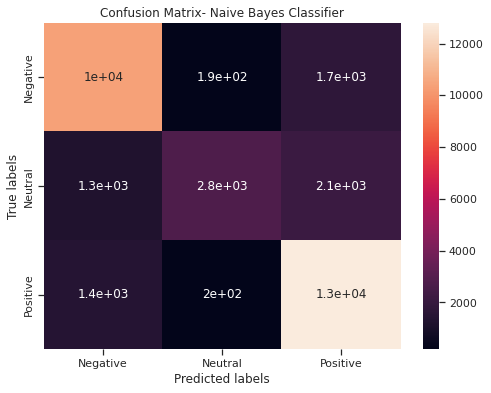

In [73]:

# Confusion Matrix
cm = confusion_matrix(y_train,y_pred_NB_train)
print(cm)

# Plot No- 32
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix- Naive Bayes Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)



In [74]:
# Model Performance 
NB_precision = precision_score(y_pred_NB_valid,y_valid, average ='weighted')
NB_recall = recall_score(y_pred_NB_valid,y_valid,average ='weighted')
NB_f1_score = f1_score(y_pred_NB_valid,y_valid,average ='weighted')
print(NB_precision, NB_recall, NB_f1_score)

0.7540417248968612 0.6800291545189504 0.7053644517742009


In [75]:

# Model 2: Stochastic Gradient Descent-SGD Classifier
# Hyperparameter tuning and Cross Validation (CV)

# importing library
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
# class instantiation
sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

param_grid ={}

# fitting parameter with Cross Validation & hyperparameter tuning
grid_sgd = GridSearchCV(sgd_clf, param_grid, verbose = 3, cv = 5)

grid_sgd.fit(X_train,y_train)



Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ..................................., score=0.791 total time=   0.6s
[CV 2/5] END ..................................., score=0.810 total time=   0.5s
[CV 3/5] END ..................................., score=0.800 total time=   0.6s
[CV 4/5] END ..................................., score=0.799 total time=   0.6s
[CV 5/5] END ..................................., score=0.800 total time=   0.7s


GridSearchCV(cv=5, estimator=SGDClassifier(random_state=0), param_grid={},
             verbose=3)

In [76]:


# prediction
y_pred_sgd_valid = grid_sgd.predict(X_valid)
y_pred_sgd_train = grid_sgd.predict(X_train)

# checking accuracy and printing classification report
sgd_accuracy = accuracy_score(y_valid,y_pred_sgd_valid)

print("Train accuracy Score      : ",grid_sgd.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(y_pred_sgd_valid,y_valid))



Train accuracy Score      :  0.9239787395596052
Validation accuracy Score :  0.8066083576287658
              precision    recall  f1-score   support

          -1       0.82      0.82      0.82      3052
           0       0.72      0.69      0.70      1607
           1       0.84      0.85      0.84      3573

    accuracy                           0.81      8232
   macro avg       0.79      0.79      0.79      8232
weighted avg       0.81      0.81      0.81      8232



[[11481   300   537]
 [  362  5421   387]
 [  561   356 13520]]


[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Neutral'), Text(0, 2.5, 'Positive')]

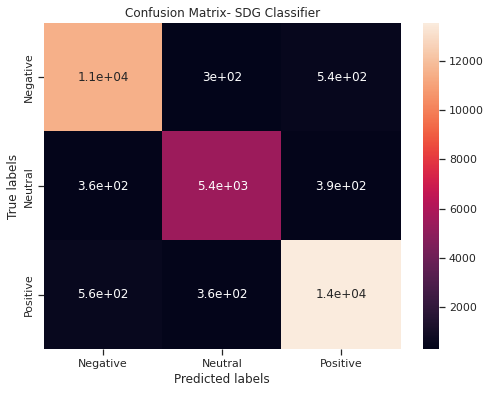

In [77]:


# Confusion Matrix
cm1 = confusion_matrix(y_train, y_pred_sgd_train)
print(cm1)

# Plot No- 33
ax= plt.subplot()
sns.heatmap(cm1, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix- SDG Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)



In [78]:
# Model Performance 
sgd_precision = precision_score(y_pred_sgd_valid,y_valid, average ='weighted')
sgd_recall = recall_score(y_pred_sgd_valid,y_valid,average ='weighted')
sgd_f1_score = f1_score(y_pred_sgd_valid,y_valid,average ='weighted')
print(sgd_precision, sgd_recall, sgd_f1_score)

0.8057511950207166 0.8066083576287658 0.8061076051351538


rfc

In [79]:
# importing library
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [80]:
# # creating param dict to check diffirent value of parameter
# grid_values = {'n_estimators':[60,80,100],
#                'max_depth':[100,200,300]}
               
# #fit the parameter with Cross Validation 
# rf_clf = GridSearchCV(RandomForestClassifier(), param_grid= grid_values,verbose= 3, cv=5, scoring ='accuracy')
# #training model
# rf_clf.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ....max_depth=100, n_estimators=60;, score=0.681 total time=  39.2s
[CV 2/5] END ....max_depth=100, n_estimators=60;, score=0.687 total time=  42.2s
[CV 3/5] END ....max_depth=100, n_estimators=60;, score=0.689 total time=  40.1s
[CV 4/5] END ....max_depth=100, n_estimators=60;, score=0.681 total time=  39.5s
[CV 5/5] END ....max_depth=100, n_estimators=60;, score=0.689 total time=  37.5s
[CV 1/5] END ....max_depth=100, n_estimators=80;, score=0.687 total time=  51.8s
[CV 2/5] END ....max_depth=100, n_estimators=80;, score=0.693 total time=  52.2s
[CV 3/5] END ....max_depth=100, n_estimators=80;, score=0.697 total time=  52.0s
[CV 4/5] END ....max_depth=100, n_estimators=80;, score=0.681 total time=  52.5s
[CV 5/5] END ....max_depth=100, n_estimators=80;, score=0.695 total time=  51.4s
[CV 1/5] END ...max_depth=100, n_estimators=100;, score=0.682 total time= 1.1min
[CV 2/5] END ...max_depth=100, n_estimators=100;,

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [100, 200, 300],
                         'n_estimators': [60, 80, 100]},
             scoring='accuracy', verbose=3)

In [81]:
# print(rf_clf.best_params_)
# print(rf_clf.best_estimator_)

{'max_depth': 300, 'n_estimators': 100}
RandomForestClassifier(max_depth=300)


In [82]:
# #prediction
# y_pred_rf_train = rf_clf.predict(X_train)
# y_pred_rf_valid = rf_clf.predict(X_valid)

# rf_accuracy = accuracy_score(y_valid, y_pred_rf_valid)
# print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
# print("Validation accuracy Score : ",rf_accuracy )
# print(classification_report(y_pred_rf_valid,y_valid))

Training accuracy Score    :  0.9907061503416856
Validation accuracy Score :  0.7591107871720116
              precision    recall  f1-score   support

          -1       0.74      0.79      0.76      2871
           0       0.66      0.67      0.67      1540
           1       0.82      0.77      0.80      3821

    accuracy                           0.76      8232
   macro avg       0.74      0.74      0.74      8232
weighted avg       0.76      0.76      0.76      8232



[[12180   135     3]
 [    2  6167     1]
 [    3   162 14272]]


[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Neutral'), Text(0, 2.5, 'Positive')]

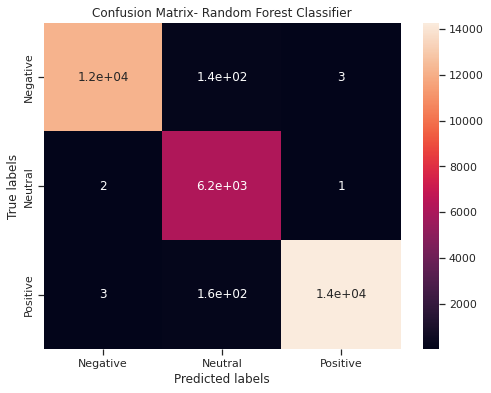

In [83]:
# # Confusion Matrix
# cm2 = confusion_matrix(y_train, y_pred_rf_train)
# print(cm2)


# ax= plt.subplot()
# sns.heatmap(cm2, annot=True, ax = ax) #annot=True to annotate cells

# # labels, title and ticks
# ax.set_xlabel('Predicted labels', fontweight= 'bold')
# ax.set_ylabel('True labels', fontweight= 'bold')
# ax.set_title('Confusion Matrix- Random Forest Classifier')
# ax.xaxis.set_ticklabels(labels)
# ax.yaxis.set_ticklabels(labels)

In [84]:
# # Model Performance
# rf_precision = precision_score(y_pred_rf_valid,y_valid, average ='weighted')
# rf_recall = recall_score(y_pred_rf_valid,y_valid,average ='weighted')
# rf_f1_score = f1_score(y_pred_rf_valid,y_valid,average ='weighted')
# print(rf_precision, rf_recall, rf_f1_score)

0.7612594624146084 0.7591107871720116 0.7595558874942598


In [85]:
#import the packages
from sklearn.svm import SVC

svc_clf =SVC (kernel ='linear',verbose = 3)
svc_clf.fit(X_train, y_train) # model fitting on train dataset

[LibSVM]

SVC(kernel='linear', verbose=3)

In [86]:
svc_clf.best_estimator_

AttributeError: ignored

In [87]:
# Get the predicted classes
y_pred_svc_train = svc_clf.predict(X_train)
y_pred_svc_valid = svc_clf.predict(X_valid)

# checking accuracy and printing the classification report
svm_accuracy = accuracy_score(y_valid, y_pred_svc_valid)
print("Training accuracy Score    : ",svc_clf.score(X_train,y_train))
print("Validation accuracy Score : ",svm_accuracy )
print(classification_report(y_pred_svc_valid,y_valid))

Training accuracy Score    :  0.9622779043280182
Validation accuracy Score :  0.7834062196307094
              precision    recall  f1-score   support

          -1       0.80      0.78      0.79      3147
           0       0.69      0.67      0.68      1582
           1       0.81      0.83      0.82      3503

    accuracy                           0.78      8232
   macro avg       0.77      0.76      0.76      8232
weighted avg       0.78      0.78      0.78      8232



[[11899   156   263]
 [  181  5815   174]
 [  277   191 13969]]


[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Neutral'), Text(0, 2.5, 'Positive')]

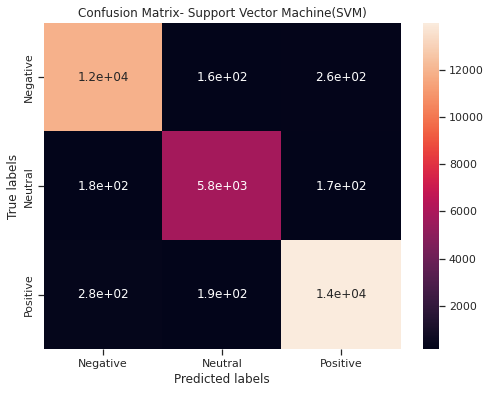

In [88]:
# Confusion Matrix
cm3 = confusion_matrix(y_train, y_pred_svc_train)
print(cm3)


# Plot No- 35
ax= plt.subplot()
sns.heatmap(cm3, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix- Support Vector Machine(SVM)')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [89]:
# Model Performance 
svc_precision = precision_score(y_pred_svc_valid,y_valid, average ='weighted')
svc_recall = recall_score(y_pred_svc_valid,y_valid,average ='weighted')
svc_f1_score = f1_score(y_pred_svc_valid,y_valid,average ='weighted')
print(svc_precision, svc_recall)

0.7827739952905135 0.7834062196307094


In [90]:

# Model 5: Logistic Regression

# importing required library
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV



In [91]:
# logistic = LogisticRegression() # class instantiation

# #set the hyperparmeter
# param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 0.5, 1, 10, 100, 300, 500, 1000] }


# #fit the hyperparameter with Cross Validation
# grid_lr = GridSearchCV(LogisticRegression(), param_grid, n_jobs = -1, verbose = 3, cv = 5)
# #training model
# grid_lr.fit(X_train, y_train)



Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 10, 100, 300, 500,
                               1000],
                         'penalty': ['l1', 'l2']},
             verbose=3)

In [92]:
print(grid_lr.best_score_)
print(grid_lr.best_params_)

0.7881245254365984
{'C': 0.5, 'penalty': 'l2'}


In [93]:


#prediction
y_pred_lr_train = grid_lr.predict(X_train)
y_pred_lr_valid = grid_lr.predict(X_valid)
# checking accuracy and printing classification report
lr_accuracy = accuracy_score(y_valid, y_pred_lr_valid)
print("Training accuracy Score    : ",grid_lr.score(X_train,y_train))
print("Validation accuracy Score : ",lr_accuracy )
print(classification_report(y_pred_lr_valid,y_valid))



Training accuracy Score    :  0.9256188306757783
Validation accuracy Score :  0.7948250728862973
              precision    recall  f1-score   support

          -1       0.80      0.82      0.81      3032
           0       0.69      0.68      0.68      1567
           1       0.83      0.83      0.83      3633

    accuracy                           0.79      8232
   macro avg       0.78      0.77      0.77      8232
weighted avg       0.79      0.79      0.79      8232



[[11454   313   551]
 [  324  5429   417]
 [  513   331 13593]]


[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Neutral'), Text(0, 2.5, 'Positive')]

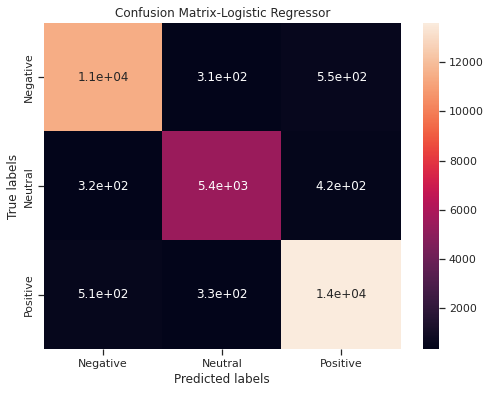

In [94]:
# Confusion Matrix
cm4 = confusion_matrix(y_train, y_pred_lr_train)
print(cm4)


# Plot No- 36
ax= plt.subplot()
sns.heatmap(cm4, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix-Logistic Regressor')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [95]:


# Model Performance 
lr_precision = precision_score(y_pred_lr_valid,y_valid, average ='weighted')
lr_recall = recall_score(y_pred_lr_valid,y_valid,average ='weighted')
lr_f1_score = f1_score(y_pred_lr_valid,y_valid,average ='weighted')
print(lr_precision, lr_recall, lr_f1_score)




0.7945793378866567 0.7948250728862973 0.7946720345096506


In [96]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 11.3 MB/s eta 0:00:00


In [97]:



# importing required library
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import accuracy_score



In [98]:


clf2 = CatBoostClassifier() # class instantiation
# fitting the model on train dataset so that model can learn parameter.
clf2.fit(X_train, y_train, eval_set=(X_valid, y_valid), verbose=False)

print('CatBoost model is fitted: ' + str(clf2.is_fitted()))
print('CatBoost model parameters:')
print(clf2.get_params())



CatBoost model is fitted: True
CatBoost model parameters:
{}


In [99]:
# predicting train and test data
y_pred_cb_valid = clf2.predict(X_valid)
y_pred_cb_train = clf2.predict(X_train)
# checking accuracy
catboost_accuracy = accuracy_score(y_valid,y_pred_cb_valid)
# printing classification report
print("Train accuracy Score    : ",clf2.score(X_train,y_train))
print("Test accuracy Score : ",catboost_accuracy )
print(classification_report(y_pred_cb_valid,y_valid))

Train accuracy Score    :  0.8254214123006833
Test accuracy Score :  0.8012633624878522
              precision    recall  f1-score   support

          -1       0.79      0.83      0.81      2919
           0       0.77      0.69      0.73      1718
           1       0.83      0.83      0.83      3595

    accuracy                           0.80      8232
   macro avg       0.79      0.78      0.79      8232
weighted avg       0.80      0.80      0.80      8232



[[ 9963   933  1422]
 [  551  4877   742]
 [ 1201   899 12337]]


[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Neutral'), Text(0, 2.5, 'Positive')]

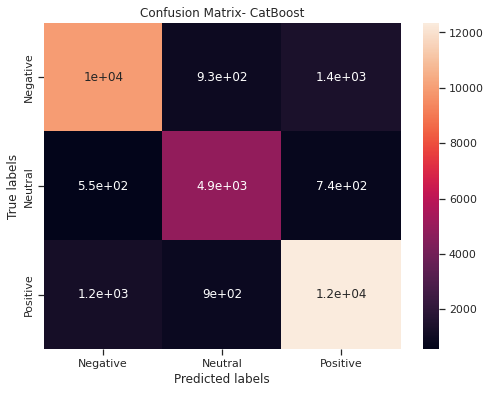

In [100]:


# Confusion Matrix
cm5 = confusion_matrix(y_train, y_pred_cb_train)
print(cm5)

# Plot No- 37
ax= plt.subplot()
sns.heatmap(cm5, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix- CatBoost')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)



In [101]:


# Model Performance 
cb_precision = precision_score(y_pred_cb_valid,y_valid, average ='weighted')
cb_recall = recall_score(y_pred_cb_valid, y_valid, average ='weighted')
cb_f1_score = f1_score(y_pred_cb_valid,y_valid,average ='weighted')
print(cb_precision, cb_recall, cb_f1_score)



0.8007956070704693 0.8012633624878522 0.8003835857166991


In [102]:
# making the dataframe which consist of models and correspoding evaluation metrics.
model_test = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression','Random Forest', 'Naive Bayes','Stochastic Gradient Decent','CatBoost'],
    'Test accuracy': [svm_accuracy, lr_accuracy,rf_accuracy, NB_accuracy,sgd_accuracy,catboost_accuracy],
    'Recall': [svc_recall, lr_recall, rf_recall, NB_recall, sgd_recall, cb_recall],
    'Precision': [svc_precision, lr_precision, rf_precision, NB_precision, sgd_precision, cb_precision],
    'F1-Score': [svc_f1_score, lr_f1_score, rf_f1_score, NB_f1_score, sgd_f1_score, cb_f1_score]
    })
model_test.sort_values(by='Test accuracy', ascending=False)
model_test

,Model,Test accuracy,Recall,Precision,F1-Score
0,Support Vector Machines,0.783406,0.783406,0.782774,0.782957
1,Logistic Regression,0.794825,0.794825,0.794579,0.794672
2,Random Forest,0.759111,0.759111,0.761259,0.759556
3,Naive Bayes,0.680029,0.680029,0.754042,0.705364
4,Stochastic Gradient Decent,0.806608,0.806608,0.805751,0.806108
5,CatBoost,0.801263,0.801263,0.800796,0.800384


([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

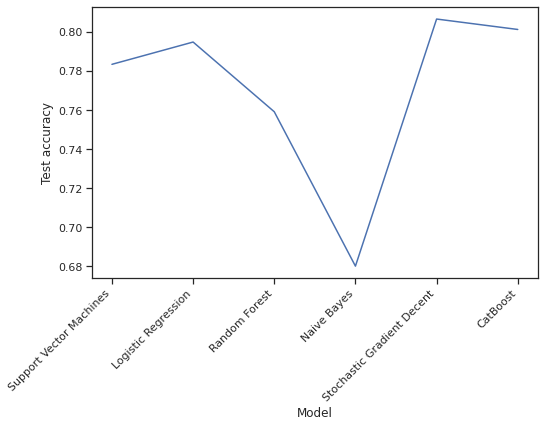

In [103]:
# Plot No - 38
# Creating plot between Test accuracy and all 6 models used
plt.figure(figsize=(8,5))
sns.lineplot(data=model_test, x='Model', y='Test accuracy')
plt.xticks(rotation=45, ha='right')